# Neural Cryptography 

In [91]:
import ctypes
# import gmpy2
# from gmpy2 import mpz
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

from keras import backend as K
from keras.models import Model
from keras.engine.input_layer import Input
from keras.layers.core import Activation, Dense
from keras.layers import Flatten, Reshape
from keras.layers.convolutional import Conv1D
from keras.layers.merge import concatenate
from keras.optimizers import Adam, RMSprop
from keras.models import load_model
from keras.utils.vis_utils import plot_model

In [92]:
model_name= 'Neural_Network_Sec'

#Parameters:

m_bits=16
k_bits=16
c_bits=16

pad='same'



m_train = 2**(m_bits)

Dr_kuldeep_file = 'models/' + model_name + 'Dr_kuldeep'
Dr_Vijay_file = 'models/' + model_name + 'Dr_Vijay'

Hacker_file = 'models/' + model_name + 'Hacker'


In [93]:
K.clear_session()

### Dr. Kuldeep Neural Network ###

k_input_m = Input(shape=(m_bits,))
k_input_k = Input(shape=(k_bits,))

k_input = concatenate([k_input_m,k_input_k], axis=1)

kdense1 = Dense(units=(m_bits + k_bits))(k_input)
kdense1a = Activation('tanh')(kdense1)

kdense2 = Dense(units=(m_bits + k_bits))(kdense1a)
kdense2a = Activation('tanh')(kdense2)

kreshape = Reshape((m_bits + k_bits,1,))(kdense2a)

# kconv1 = Conv1D(filters=16, kernel_size=8, strides=2, padding=pad)(kreshape)
# kconv1a=Activation('tanh')(kconv1)

kconv2 = Conv1D(filters=8, kernel_size=4, strides=2, padding=pad)(kreshape)
kconv2a=Activation('tanh')(kconv2)

kconv3 = Conv1D(filters=4, kernel_size=2, strides=1, padding=pad)(kconv2a)
kconv3a=Activation('tanh')(kconv3)

kconv4 = Conv1D(filters=4, kernel_size=1, strides=1, padding=pad)(kconv3a)
kconv4a=Activation('tanh')(kconv4)

kconv5 = Conv1D(filters=1, kernel_size=1, strides=1, padding=pad)(kconv4a)
kconv5a=Activation('sigmoid')(kconv5)

koutput = Flatten()(kconv5a)

Dr_kuldeep = Model([k_input_m,k_input_k], koutput, name='Dr_kuldeep')
Dr_kuldeep.summary()


### Dr. Vijay Neural Network ###

v_input_m = Input(shape=(c_bits,))
v_input_k = Input(shape=(k_bits,))

v_input = concatenate([v_input_m,v_input_k], axis=1)

vdense1 = Dense(units=(c_bits + k_bits))(v_input)
vdense1a = Activation('tanh')(vdense1)

vdense2 = Dense(units=(c_bits + k_bits))(vdense1a)
vdense2a = Activation('tanh')(vdense2)

vreshape = Reshape((c_bits + k_bits,1,))(vdense2a)

# vconv1 = Conv1D(filters=16, kernel_size=8, strides=2, padding=pad)(vreshape)
# vconv1a=Activation('tanh')(vconv1)

vconv2 = Conv1D(filters=8, kernel_size=4, strides=2, padding=pad)(vreshape)
vconv2a=Activation('tanh')(vconv2)

vconv3 = Conv1D(filters=4, kernel_size=2, strides=1, padding=pad)(vconv2a)
vconv3a=Activation('tanh')(vconv3)

vconv4 = Conv1D(filters=4, kernel_size=1, strides=1, padding=pad)(vconv3a)
vconv4a=Activation('tanh')(vconv4)

vconv5 = Conv1D(filters=1, kernel_size=1, strides=1, padding=pad)(vconv4a)
vconv5a=Activation('sigmoid')(vconv5)

voutput = Flatten()(vconv5a)

Dr_Vijay = Model([v_input_m,v_input_k], voutput, name='Dr_Vijay')
Dr_Vijay.summary()


### Hacker's Neural Network ###


h_input = Input(shape=(c_bits,))
# v_input_k = Input(shape=(k_bits))


hdense1 = Dense(units=(c_bits + k_bits))(h_input)
hdense1a = Activation('tanh')(hdense1)

hdense2 = Dense(units=(c_bits + k_bits))(hdense1a)
hdense2a = Activation('tanh')(hdense2)


hdense3 = Dense(units=(c_bits + k_bits))(hdense2a)
hdense3a = Activation('tanh')(hdense3)

hreshape = Reshape((c_bits + k_bits, 1,))(hdense3a)

# hconv1 = Conv1D(filters=8, kernel_size=4, strides=2, padding=pad)(hreshape)
# hconv1a=Activation('tanh')(hconv1)

hconv2 = Conv1D(filters=8, kernel_size=4, strides=2, padding=pad)(hreshape)
hconv2a=Activation('tanh')(hconv2)

hconv3 = Conv1D(filters=4, kernel_size=2, strides=1, padding=pad)(hconv2a)
hconv3a=Activation('tanh')(hconv3)

hconv4 = Conv1D(filters=4, kernel_size=1, strides=1, padding=pad)(hconv3a)
hconv4a=Activation('tanh')(hconv4)

hconv5 = Conv1D(filters=1, kernel_size=1, strides=1, padding=pad)(hconv4a)
hconv5a=Activation('sigmoid')(hconv5)

houtput = Flatten()(hconv5a)

Hacker = Model(h_input, houtput, name='Hacker')
Hacker.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 16)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 16)           0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 32)           0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 32)           1056        concatenate_1[0][0]              
__________

In [94]:
Dr_kuldeep.compile(loss='mse', optimizer='sgd')
Dr_Vijay.compile(loss='mse', optimizer='sgd')
Hacker.compile(loss='mse', optimizer='sgd')

In [95]:
if False:
    Dr_kuldeep.summary()
    Dr_Vijay.summary()
    Hacker.summary()

In [96]:
# Establish the communication channels by linking inputs to outputs
#
Dr_kout = Dr_kuldeep([k_input_m, k_input_k])
Dr_vout = Dr_Vijay( [Dr_kout, v_input_k] )# Dr_Vijay sees ciphertext AND key
hackerout = Hacker( Dr_kout )# Hacker doesn't see the key, only the cipher

# Loss for Hacker is just L1 distance between k_input_m and hackerout. The sum
# is taken over all the bits in the message. The quantity inside the K.mean()
# is per-example loss. We take the average across the entire mini-batch
#
hackerloss = K.mean(  K.sum(K.abs(k_input_m - hackerout), axis=-1)  )

# Loss for Dr_kuldeep-Vijay communication depends on Dr_Vijays reconstruction, but
# also on Hacker ability to decrypt the message. Hacker should do no better
# than random guessing, so on average she/he will guess half the bits right.
#
Dr_vloss = K.mean(  K.sum(K.abs(k_input_m - Dr_vout), axis=-1)  )
Dr_kvloss = Dr_vloss + K.square(m_bits/2 - hackerloss)/( (m_bits//2)**2 )

# Optimizer and compilation
#
Dr_kvoptim = Adam(lr=0.001)
hackeroptim = Adam(lr=0.001) 


# Build and compile the Dr_kulvijay model, used for training Dr_Kuldeep_Vijay networks
#
Dr_kvmodel = Model([k_input_m, k_input_k, v_input_k], Dr_vout, name='Dr_kvmodel')
Dr_kvmodel.add_loss(Dr_kvloss)
Dr_kvmodel.compile(optimizer=Dr_kvoptim)


# Build and compile the Hacker model, used for training Hacker net (with Dr_Kuldeep on hold)
#
Dr_kuldeep.trainable = False
hackermodel = Model([k_input_m, k_input_k], hackerout, name='hackermodel')
hackermodel.add_loss(hackerloss)
hackermodel.compile(optimizer=hackeroptim)

In [97]:
Dr_kvlosses = []
Dr_vlosses = []
hackerlosses = []

# For 16 bit

In [99]:
n_epochs = 5  
batch_size = 512
n_batches = m_train // batch_size

Dr_kvcycles = 1
hackercycles = 2

epoch = 0
print("Training for", n_epochs, "epochs with", n_batches, "batches of size", batch_size)

while epoch < n_epochs:
    Dr_kvlosses0 = []
    Dr_vlosses0 = []
    hackerlosses0 = []
    for iteration in range(n_batches):
        
        # Train the K-V+H network
        #
        Dr_kuldeep.trainable = True
        for cycle in range(Dr_kvcycles):
            # Select a random batch of messages, and a random batch of keys
            #
            m_batch = np.random.randint(0, 2, m_bits * batch_size).reshape(batch_size, m_bits)
            k_batch = np.random.randint(0, 2, k_bits * batch_size).reshape(batch_size, k_bits)
            loss = Dr_kvmodel.train_on_batch([m_batch, k_batch, k_batch], None)
        
        Dr_kvlosses0.append(loss)
        Dr_kvlosses.append(loss)
        Dr_kvavg = np.mean(Dr_kvlosses0)
            
        # Evaluate Dr_Vijay's ability to decrypt a message
        m_enc = Dr_kuldeep.predict([m_batch, k_batch])
        m_dec = Dr_Vijay.predict([m_enc, k_batch])
        loss = np.mean(  np.sum( np.abs(m_batch - m_dec), axis=-1)  )
        Dr_vlosses0.append(loss)
        Dr_vlosses.append(loss)
        Dr_vavg = np.mean(Dr_vlosses0)
        
        # Train the Hacker network
        #
        Dr_kuldeep.trainable = False
        for cycle in range(hackercycles):
            m_batch = np.random.randint(0, 2, m_bits * batch_size).reshape(batch_size, m_bits)
            k_batch = np.random.randint(0, 2, k_bits * batch_size).reshape(batch_size, k_bits)
            loss = hackermodel.train_on_batch([m_batch, k_batch], None)
        
        hackerlosses0.append(loss)
        hackerlosses.append(loss)
        hackeravg = np.mean(hackerlosses0)
        
        if iteration % max(1, (n_batches // 100)) == 0:
            print("\rEpoch {:3}: {:3}% | Dr_kulvijay: {:2.3f} | Hacker: {:2.3f} | Dr_Vijay: {:2.3f}".format(
                epoch, 100 * iteration // n_batches, Dr_kvavg, hackeravg, Dr_vavg), end="")
            sys.stdout.flush()
    
    print()
    epoch += 1
    
print('Training finished.')

Training for 5 epochs with 128 batches of size 512


e:\program\anaconda\envs\tensorflow1\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch   0:   2% | Dr_kulvijay: 8.003 | Hacker: 8.000 | Dr_Vijay: 0.058

e:\program\anaconda\envs\tensorflow1\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch   0:  99% | Dr_kulvijay: 7.230 | Hacker: 6.217 | Dr_Vijay: 0.060
Epoch   1:  99% | Dr_kulvijay: 4.390 | Hacker: 3.349 | Dr_Vijay: 0.058
Epoch   2:  99% | Dr_kulvijay: 3.216 | Hacker: 2.465 | Dr_Vijay: 0.062
Epoch   3:  99% | Dr_kulvijay: 2.170 | Hacker: 2.094 | Dr_Vijay: 0.060
Epoch   4:  99% | Dr_kulvijay: 1.576 | Hacker: 2.233 | Dr_Vijay: 0.058
Training finished.


# For 32 bit

In [67]:
n_epochs = 80
batch_size = 262144
n_batches = m_train // batch_size
# n_batches = m_train 
Dr_kvcycles = 1
hackercycles = 2

epoch = 0
print("Training for", n_epochs, "epochs with", n_batches, "batches of size", batch_size)
# print("Training for", n_epochs, "epochs with", n_batches, "batches of size")

while epoch < n_epochs:
    Dr_kvlosses0 = []
    Dr_vlosses0 = []
    hackerlosses0 = []
    for iteration in range(n_batches):
        
        # Train the K-V+H network
        #
        Dr_kuldeep.trainable = True
        for cycle in range(Dr_kvcycles):
            # Select a random batch of messages, and a random batch of keys
            #
            m_batch = np.random.randint(0, 2, m_bits * m_bits).reshape(m_bits, m_bits)
            k_batch = np.random.randint(0, 2, k_bits * k_bits).reshape(k_bits, k_bits)
            loss = Dr_kvmodel.train_on_batch([m_batch, k_batch, k_batch], None)
        
        Dr_kvlosses0.append(loss)
        Dr_kvlosses.append(loss)
        Dr_kvavg = np.mean(Dr_kvlosses0)
            
        # Evaluate Dr_Vijay's ability to decrypt a message
        m_enc = Dr_kuldeep.predict([m_batch, k_batch])
        m_dec = Dr_Vijay.predict([m_enc, k_batch])
        loss = np.mean(  np.sum( np.abs(m_batch - m_dec), axis=-1)  )
        Dr_vlosses0.append(loss)
        Dr_vlosses.append(loss)
        Dr_vavg = np.mean(Dr_vlosses0)
        
        # Train the Hacker network
        #
        Dr_kuldeep.trainable = False
        for cycle in range(hackercycles):
            m_batch = np.random.randint(0, 2, m_bits * m_bits).reshape(m_bits, m_bits)
            k_batch = np.random.randint(0, 2, k_bits * k_bits).reshape(k_bits, k_bits)
            loss = hackermodel.train_on_batch([m_batch, k_batch], None)
        
        hackerlosses0.append(loss)
        hackerlosses.append(loss)
        hackeravg = np.mean(hackerlosses0)
        
        if iteration % max(1, (n_batches // 100)) == 0:
            print("\rEpoch {:3}: {:3}% | Dr_kulvijay: {:2.3f} | Hacker: {:2.3f} | Dr_Vijay: {:2.3f}".format(
                epoch, 100 * iteration // n_batches, Dr_kvavg, hackeravg, Dr_vavg), end="")
            sys.stdout.flush()
    
    print()
    epoch += 1
    
print('Training finished.')

Training for 10 epochs with 0 batches of size 262144










Training finished.


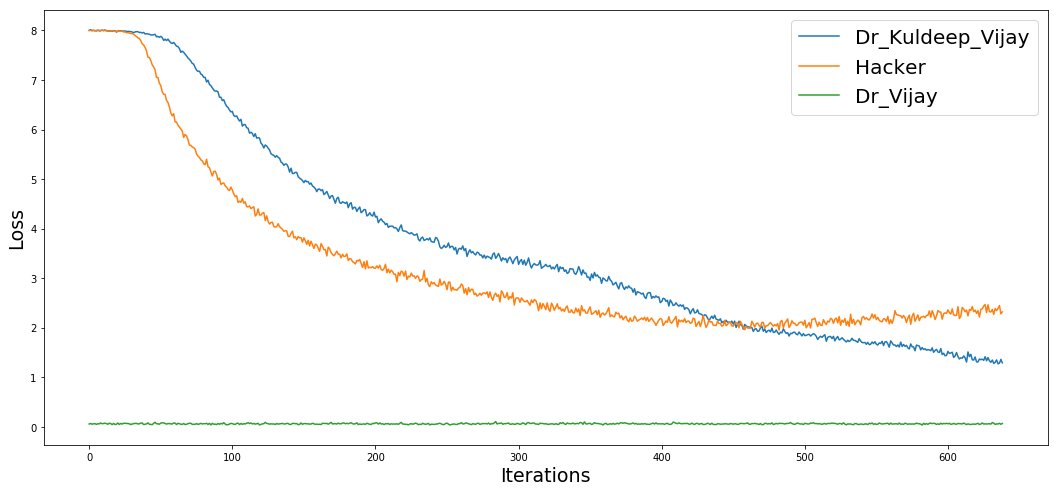

In [100]:

steps = -1

plt.figure(figsize=(18, 8))
plt.plot(Dr_kvlosses[:steps], label='Dr_Kuldeep_Vijay')
plt.plot(hackerlosses[:steps], label='Hacker')
plt.plot(Dr_vlosses[:steps], label='Dr_Vijay')
plt.xlabel("Iterations", fontsize=19)
plt.ylabel("Loss", fontsize=19)
plt.legend(fontsize=20)

# plt.savefig("models/" + model_name + "1.png", transparent=False) #dpi=100
plt.show()

In [45]:
if False: #Don't overwrite by accident
    Dr_kuldeep.save(Dr_kuldeep_file + '.h5', overwrite=True)
    Dr_Vijay.save(Dr_Vijay_file + '.h5', overwrite=True)
    Hacker.save(Hacker_file + '.h5', overwrite=True)

# Testing

In [ ]:
!pip install pydot

In [98]:
Dr_kuldeep = load_model(Dr_kuldeep_file + '.h5')
Dr_Vijay = load_model(Dr_Vijay_file + '.h5')
Hacker = load_model(Hacker_file + '.h5')
# plot_model(Dr_kuldeep, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
# import keras
# import pydot as pyd
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# keras.utils.vis_utils.pydot = pyd

# #Visualize Model

# def visualize_model(model):
#     return SVG(model_to_dot(model).create(prog='dot', format='svg'))
# #create your model
# #then call the function on your model
# visualize_model(Dr_kuldeep)

In [102]:
n_examples = 10000

m_batch = np.random.randint(0, 2, m_bits * n_examples).reshape(n_examples, m_bits)
k_batch = np.random.randint(0, 2, m_bits * n_examples).reshape(n_examples, m_bits)

m_enc = Dr_kuldeep.predict([m_batch, k_batch])
m_dec = (Dr_Vijay.predict([m_enc, k_batch]) > 0.5)
m_att = (Hacker.predict(m_enc) > 0.5)

vdiff = np.abs(m_batch - m_dec)
vsum = np.sum(vdiff, axis=-1)
hackdiff = np.abs(m_batch - m_att)
hacksum = np.sum(hackdiff, axis=-1)

print("Dr_Vijay % correct: ", 100.0*np.sum(vsum == 0) / n_examples, '%')
print("Hacker % correct: ", 100.0*np.sum(hacksum == 0) / n_examples, '%')

Dr_Vijay % correct:  96.7 %
Hacker % correct:  0.1 %
